In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['MAN', 'BMA']
di_sugar2= ['DManpa', 'DManpb']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 78 
valid torsion1 and torsion2: (78, 78)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['5.D', '4.D'], ['O3B', '4C1'])
(['6.E', '3.E'], ['4C1', '4C1'])
(['5.E', '4.E'], ['4C1', 'B14'])
(['4.B', '3.B'], ['1C4', 'O3B'])
(['4.Z', '3.Z'], ['-', '-'])
(['6.Z', '3.Z'], ['BO3', '-'])
(['4.S', '3.S'], ['1S3', '-'])
(['6.S', '3.S'], ['BO3', '-'])
(['4.V', '3.V'], ['1S3', '-'])
(['6.V', '3.V'], ['BO3', '-'])
(['4.E', '3.E'], ['14B', 'BO3'])
(['5.D', '4.D'], ['O3B', '-'])
(['4.C', '3.C'], ['-', 'OH1'])
(['4.E', '3.E'], ['-', '-'])
(['4.B', '3.B'], ['4C1', '-'])
(['5.D', '4.D'], ['-', '4C1'])
(['4.H', '3.H'], ['-', '-'])
(['4.B', '3.B'], ['-', '-'])
(['4.E', '3.E'], ['BO3', 'BO3'])
(['6.F', '3.F'], ['4C1', '4C1'])
(['5.F', '4.F'], ['4C1', '-'])
(['4.B', '3.B'], ['1S3', '-'])
(['4.C', '3.C'], ['25B', '4C1'])
(['4.H', '3.H'], ['B14', '-'])
(['6.F', '3.F'], ['-', '4C1'])
(['5.F', '4.F'], ['-', '-'])
(['4.F', '3.F'], ['BO3', '4C1'])
(['5.F', '3.F'], ['1S3', '4C1'])
(['4.A', '3.A'], ['-', '4C1'])
(['5.A', '3.A'], ['14B', '4C1'])
(['4.C', '3.C'], ['4C1', '-'])
(['4.C', '3.C'], ['1C4', '-

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2hca.pdb D MAN 5 C1
../../pdbs//2hca.pdb D BMA 4 O4
2745 2742
Connection found between 2745 and 2742
../../pdbs//4mmz.pdb E MAN 6 C1
../../pdbs//4mmz.pdb E BMA 3 O4
13240 13215
No connection found between 13240 and 13215
1
../../pdbs//4mmz.pdb E MAN 5 C1
../../pdbs//4mmz.pdb E BMA 4 O4
13229 13226
Connection found between(2) 13229 and 13226
../../pdbs//1jdn.pdb B MAN 4 C1
../../pdbs//1jdn.pdb B BMA 3 O4
3271 3268
Connection found between 3271 and 3268
../../pdbs//7ugp.pdb Z MAN 4 C1
../../pdbs//7ugp.pdb Z BMA 3 O4
24543 24540
Connection found between(2) 24543 and 24540
../../pdbs//7ugp.pdb Z MAN 6 C1
../../pdbs//7ugp.pdb Z BMA 3 O4
24565 24540
No connection found between 24565 and 24540
5
../../pdbs//7ugp.pdb S MAN 4 C1
../../pdbs//7ugp.pdb S BMA 3 O4
24226 24223
Connection found between(2) 24226 and 24223
../../pdbs//7ugp.pdb S MAN 6 C1
../../pdbs//7ugp.pdb S BMA 3 O4
24248 24223
No connection found between 24248 and 24223
7
../../pdbs//7ugp.pdb V MAN 4 C1
../../pdbs//7ugp

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2hca.pdb,D MAN 5 C2 C1 BMA 4 O4 C4,D MAN 5 C1 BMA 4 O4 C4 C5,286.86680,221.5350,"([MAN(5_D_), BMA(4_D_)], [44.15, 42.88])",BMA(6_D_)-MAN(5_D_)-BMA(4_D_)-BMA(3_D_)-NAG(2_...,DManpb1-4DManpa1-4DManpb1-4DManpb1-4DGlcpNAcb1...,"([5.D, 4.D], [O3B, 4C1])"
1,4mmz.pdb,E MAN 5 C2 C1 BMA 4 O4 C4,E MAN 5 C1 BMA 4 O4 C4 C5,317.34290,269.0470,"([MAN(5_E_), BMA(4_E_)], [158.34, 141.24])",MAN(5_E_)-BMA(4_E_)-[MAN(6_E_)]-BMA(3_E_)-NAG(...,DManpa1-4DManpb1-6[DManpa1-3]DManpb1-4DGlcpNAc...,"([5.E, 4.E], [4C1, B14])"
2,1jdn.pdb,B MAN 4 C2 C1 BMA 3 O4 C4,B MAN 4 C1 BMA 3 O4 C4 C5,201.57500,154.8750,"([MAN(4_B_), BMA(3_B_)], [97.14, 93.41])",BMA(6_B_)-[BMA(5_B_)-MAN(4_B_)]-BMA(3_B_)-NDG(...,DManpb1-4DManpa1-4[DManpb1-6]DManpb1-4DGlcpNAc...,"([4.B, 3.B], [1C4, O3B])"
3,7ugp.pdb,Z MAN 4 C2 C1 BMA 3 O4 C4,Z MAN 4 C1 BMA 3 O4 C4 C5,110.23100,74.5632,"([MAN(4_Z_), BMA(3_Z_)], [54.09, 48.31])",MAN(6_Z_)-[MAN(5_Z_)-MAN(4_Z_)]-BMA(3_Z_)-NAG(...,DManpa1-2DManpa1-4[DManpa1-6]DManpb1-4DGlcpNAc...,"([4.Z, 3.Z], [-, -])"
4,7ugp.pdb,S MAN 4 C2 C1 BMA 3 O4 C4,S MAN 4 C1 BMA 3 O4 C4 C5,114.25600,72.9411,"([MAN(4_S_), BMA(3_S_)], [54.47, 45.29])",MAN(6_S_)-[MAN(5_S_)-MAN(4_S_)]-BMA(3_S_)-NAG(...,DManpa1-2DManpa1-4[DManpa1-6]DManpb1-4DGlcpNAc...,"([4.S, 3.S], [1S3, -])"
5,7ugp.pdb,V MAN 4 C2 C1 BMA 3 O4 C4,V MAN 4 C1 BMA 3 O4 C4 C5,115.38700,72.2012,"([MAN(4_V_), BMA(3_V_)], [54.8, 46.88])",MAN(6_V_)-[MAN(5_V_)-MAN(4_V_)]-BMA(3_V_)-NAG(...,DManpa1-2DManpa1-4[DManpa1-6]DManpb1-4DGlcpNAc...,"([4.V, 3.V], [1S3, -])"
6,3faq.pdb,E MAN 4 C2 C1 BMA 3 O4 C4,E MAN 4 C1 BMA 3 O4 C4 C5,89.25590,233.6280,"([MAN(4_E_), BMA(3_E_)], [79.03, 80.2])",MAN(4_E_)-BMA(3_E_)-NAG(2_E_)-NAG(1_E_)-ASN(33...,DManpa1-4DManpb1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([4.E, 3.E], [14B, BO3])"
7,2dwa.pdb,D MAN 5 C2 C1 BMA 4 O4 C4,D MAN 5 C1 BMA 4 O4 C4 C5,300.59470,241.3310,"([MAN(5_D_), BMA(4_D_)], [73.56, 66.98])",BMA(6_D_)-MAN(5_D_)-BMA(4_D_)-BMA(3_D_)-NAG(2_...,DManpb1-4DManpa1-4DManpb1-4DManpb1-4DGlcpNAcb1...,"([5.D, 4.D], [O3B, -])"
8,2ays.pdb,C MAN 4 C2 C1 BMA 3 O4 C4,C MAN 4 C1 BMA 3 O4 C4 C5,195.74800,248.8080,"([MAN(4_C_), BMA(3_C_)], [97.95, 83.53])",MAN(6_C_)-MAN(5_C_)-MAN(4_C_)-BMA(3_C_)-NAG(2_...,DManpa1-4DManpa1-4DManpa1-4DManpb1-4DGlcpNAcb1...,"([4.C, 3.C], [-, OH1])"
9,2gjm.pdb,E MAN 4 C2 C1 BMA 3 O4 C4,E MAN 4 C1 BMA 3 O4 C4 C5,114.86800,261.7405,"([MAN(4_E_), BMA(3_E_)], [49.0, 49.44])",MAN(4_E_)-BMA(3_E_)-NAG(2_E_)-NAG(1_E_)-ASN(31...,DManpa1-4DManpb1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([4.E, 3.E], [-, -])"


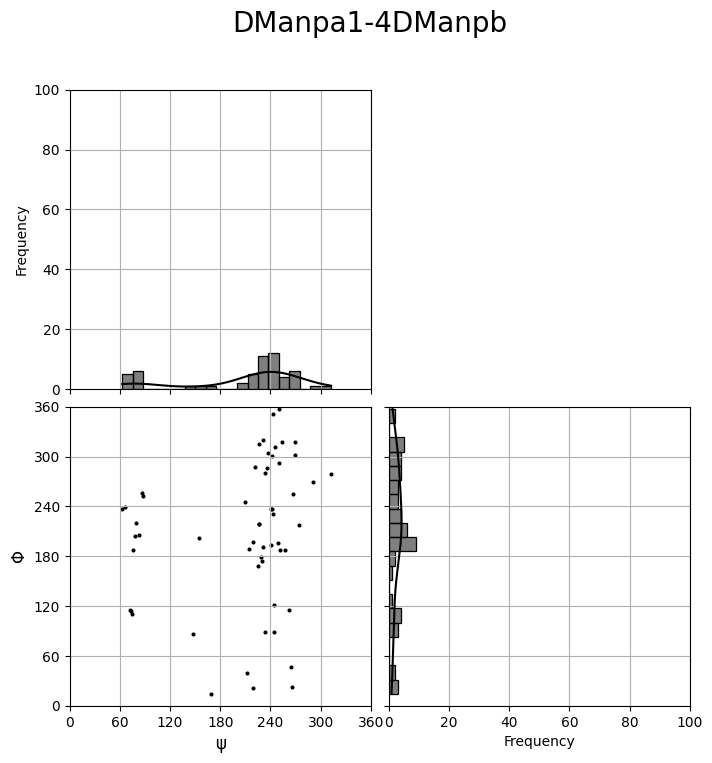

In [17]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=100,step_histogram_tick=20)